In [55]:
#imports
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)

In [56]:
Cleaned_data = pd.read_csv("CleanData.csv")
walc = Cleaned_data['Walc']
dalc = Cleaned_data['Dalc']

In [57]:
from sklearn.decomposition import PCA 

In [58]:
# Only use columns with numbers involved:
chosen_columns = ['Fedu', 'G1', 'G2', 'G3', 'Medu','absences', 'age', 
                  'failures', 'famrel', 'freetime', 'goout', 'health', 'math', 
                  'port', 'studytime', 'traveltime', 'school_num', 'sex_num','address_num', 
                  'famsize_num', 'Pstatus_num', 'Mjob_num', 'Fjob_num','reason_num', 
                  'guardian_num', 'schoolsup_num', 'famsup_num', 'activities_num','nursery_num', 
                  'higher_num', 'internet_num', 'romantic_num', 'paid_num']

Cleaned_data = Cleaned_data[chosen_columns]

In [59]:
#building PCA models
pca_model = PCA()
X_PCA = pca_model.fit_transform(Cleaned_data)

In [60]:
pca_model.explained_variance_ratio_

array([  5.68058622e-01,   2.15161860e-01,   3.34022863e-02,
         2.42039153e-02,   2.05323923e-02,   1.77053936e-02,
         1.37024493e-02,   1.21234904e-02,   1.10681675e-02,
         9.93308732e-03,   9.51262595e-03,   8.72798324e-03,
         7.22943654e-03,   6.14298526e-03,   5.38827417e-03,
         4.48444464e-03,   3.94384194e-03,   3.64583169e-03,
         2.96946294e-03,   2.88929839e-03,   2.58636224e-03,
         2.33781414e-03,   2.28280953e-03,   2.01956419e-03,
         1.71796328e-03,   1.65428883e-03,   1.61290804e-03,
         1.25532040e-03,   1.00487938e-03,   9.41053105e-04,
         8.57678400e-04,   6.34378801e-04,   2.69131496e-04])

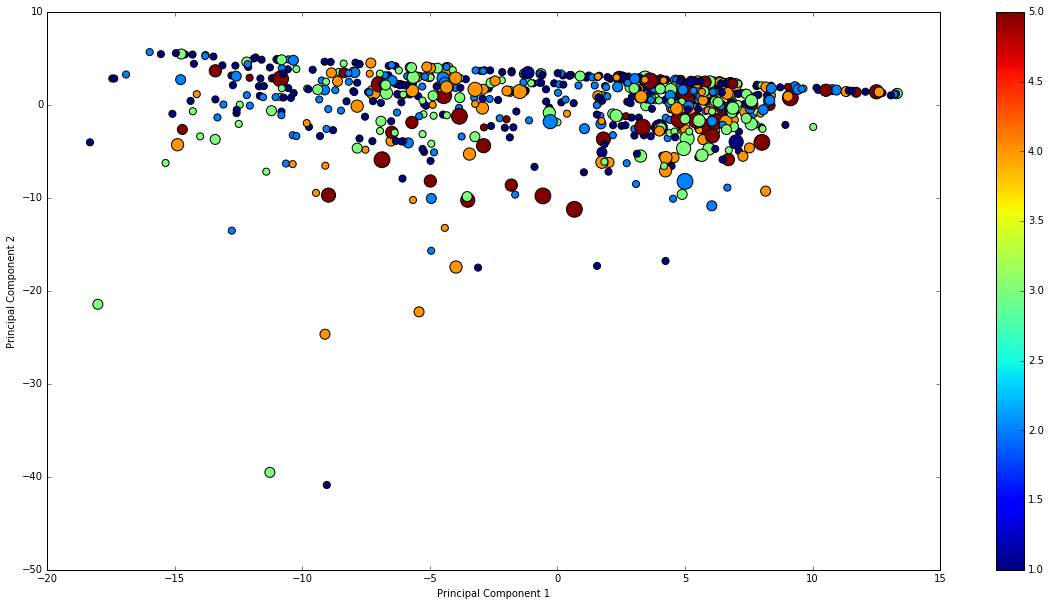

In [69]:
# PCA analysis 

plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=walc, s=dalc*50, cmap='jet')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()